Spotify dataset
Description of the Dataset:
The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

Application in Data Science:
This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

Column Descriptors:
Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration

In [38]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.Handle missing values and remove duplicate rows if necessary.

In [39]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\spotify.csv")

In [40]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [41]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [42]:
df.tail()

,Artist,Track Name,Popularity,Duration (ms),Track ID
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [44]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [45]:
df.shape

(440, 5)

In [46]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

observation: no missing values

Checking Duplicates

In [47]:
df.duplicated().sum()

27

Observation: 27 duplicate values are present.

In [48]:
#Removing Duplicates
df.drop_duplicates(inplace=True)

In [49]:
df.duplicated().sum()

0

Now all duplicte values are removed

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

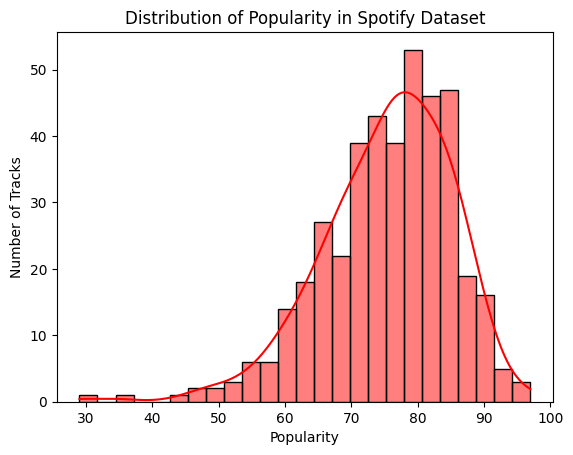

In [50]:
sns.histplot(x = 'Popularity',data=df,bins=25,kde = True,color='red')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Popularity in Spotify Dataset')
plt.show()

Most number of tracks has popularity between 70 to 85

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

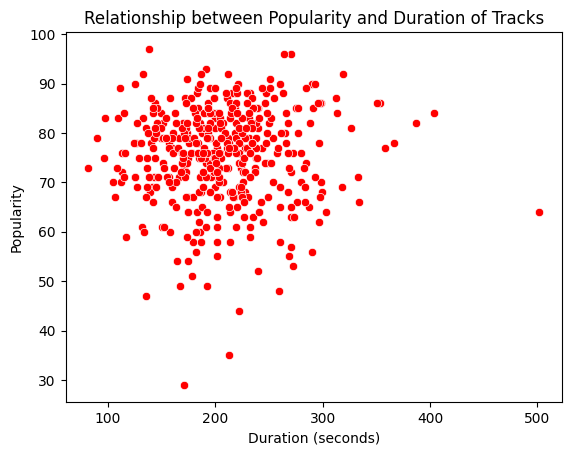

In [52]:
popularity = df['Popularity']
duration_seconds = df['Duration (ms)'] / 1000  # convert milliseconds to seconds

sns.scatterplot(x=duration_seconds,y= popularity,color='r')
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity')
plt.show()

Observation:
- Most popular songs has duration between 100 and 400 seconds
- also there is a trend with the increase in duration the population also increases linearly


4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [53]:
artist_track_counts = df['Artist'].value_counts()

In [54]:
artist_with_most_tracks = artist_track_counts.idxmax()

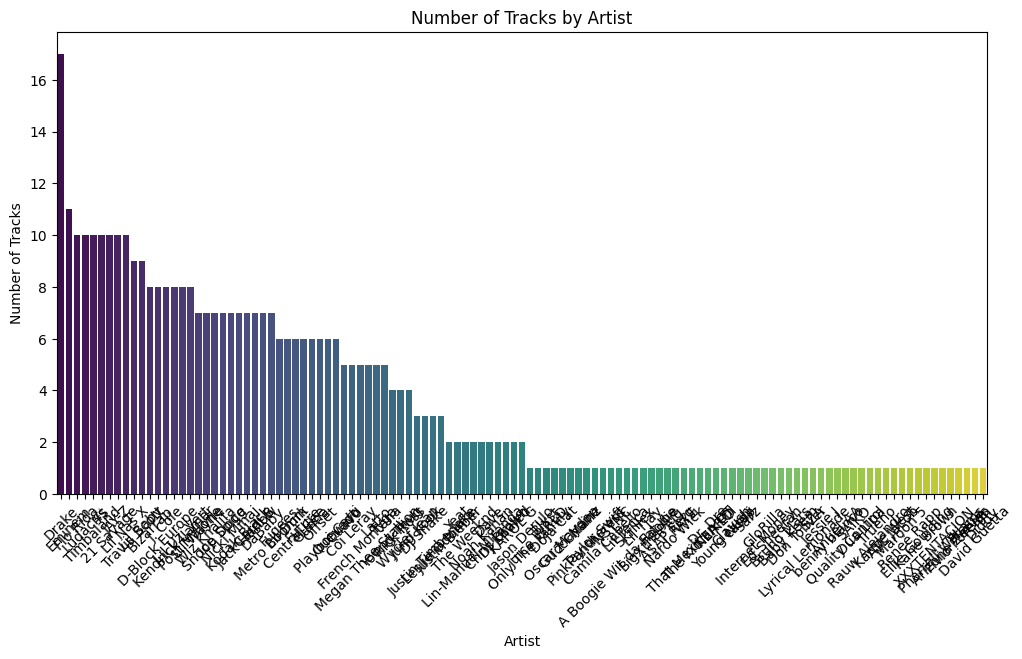

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Artist', order=artist_track_counts.index, palette='viridis')
plt.title('Number of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()


in this the artist with the highest number of tracks is: Drake with 17 track

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [56]:
df_least_popular = df.groupby(['Artist','Track Name'])['Popularity'].min().sort_values()
df_least_popular = df_least_popular.reset_index()[:5]
print("Least popular tracks:")
df_least_popular

Least popular tracks:


,Artist,Track Name,Popularity
0,Pressa,Attachments (feat. Coi Leray),29
1,Justin Bieber,Intentions,35
2,French Montana,Splash Brothers,44
3,Lil Baby,On Me - Remix,47
4,Wyclef Jean,911 (feat. Mary J. Blige),48



6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [57]:
average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean()
top_5_most_popular_artists = average_popularity_by_artist.nlargest(5)


In [59]:
average_popularity_by_artist.sort_values()

Artist
Pressa            29.000000
Justin Bieber     49.000000
Arizona Zervas    54.000000
Wyclef Jean       54.500000
RAYE              55.000000
                    ...    
¥$                85.100000
Travis Scott      86.555556
David Guetta      87.000000
Trueno            89.000000
cassö             92.000000
Name: Popularity, Length: 115, dtype: float64

The artist with the highest average popularity among the top 5 most popular artists is: cassö with an average popularity of 92.0.

7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [60]:
# Group by 'Artist' and calculate the average popularity
average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean()


# Get the top 5 most popular artists
top_5_most_popular_artists = average_popularity_by_artist.nlargest(5).index

# Filter the dataset to include only tracks by the top 5 most popular artists
top_tracks_by_popular_artists = df[df['Artist'].isin(top_5_most_popular_artists)]

# Group by 'Artist' and find the most popular track for each artist
most_popular_tracks_by_artist = top_tracks_by_popular_artists.groupby('Artist').apply(lambda x: x.loc[x['Popularity'].idxmax()])

# Display the most popular track for each artist
for artist, track in most_popular_tracks_by_artist[['Artist', 'Track Name']].values:
    print(f"{artist}: {track}")

David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
Trueno: Mamichula - con Nicki Nicole
cassö: Prada
¥$: CARNIVAL



8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

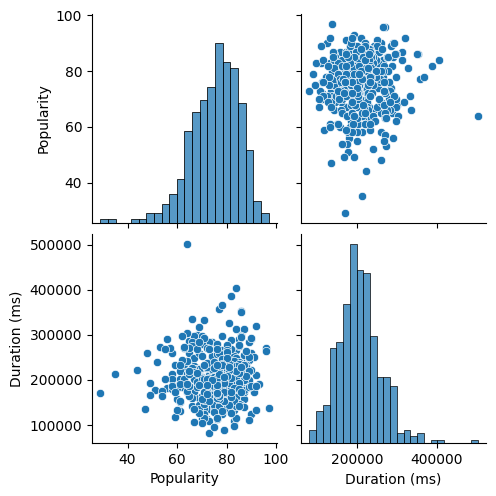

In [61]:
sns.pairplot(df)
plt.show()


9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

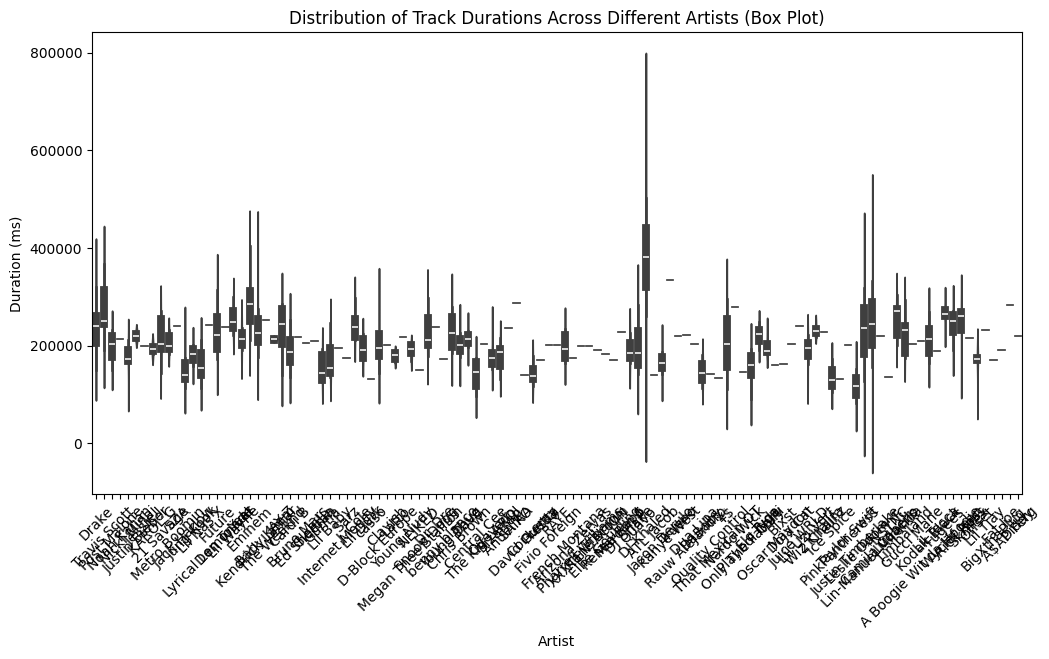

In [63]:

# Create a box plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Artist', y='Duration (ms)')
plt.title('Distribution of Track Durations Across Different Artists (Box Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()

yes, duration of tracks vary significantly across different artists.


10.How does the distribution of track popularity vary for different artists?Visualize this using a swarm plot or a violin plot

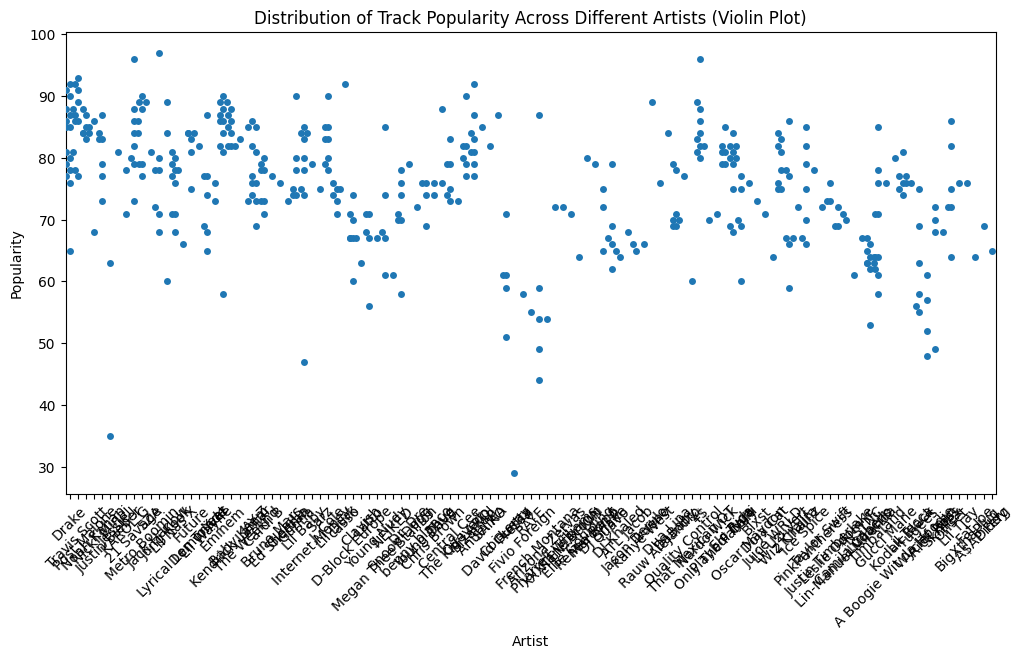

In [64]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity Across Different Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  
plt.show()